# Елисеев Е.В.
# Решение Задачи 3 "Кластеризация физической активности"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("data/Physical_Activity_Monitoring_unlabeled.csv.zip")
df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [2]:
df.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

## Исследование данных

In [3]:
df.shape

(534601, 53)

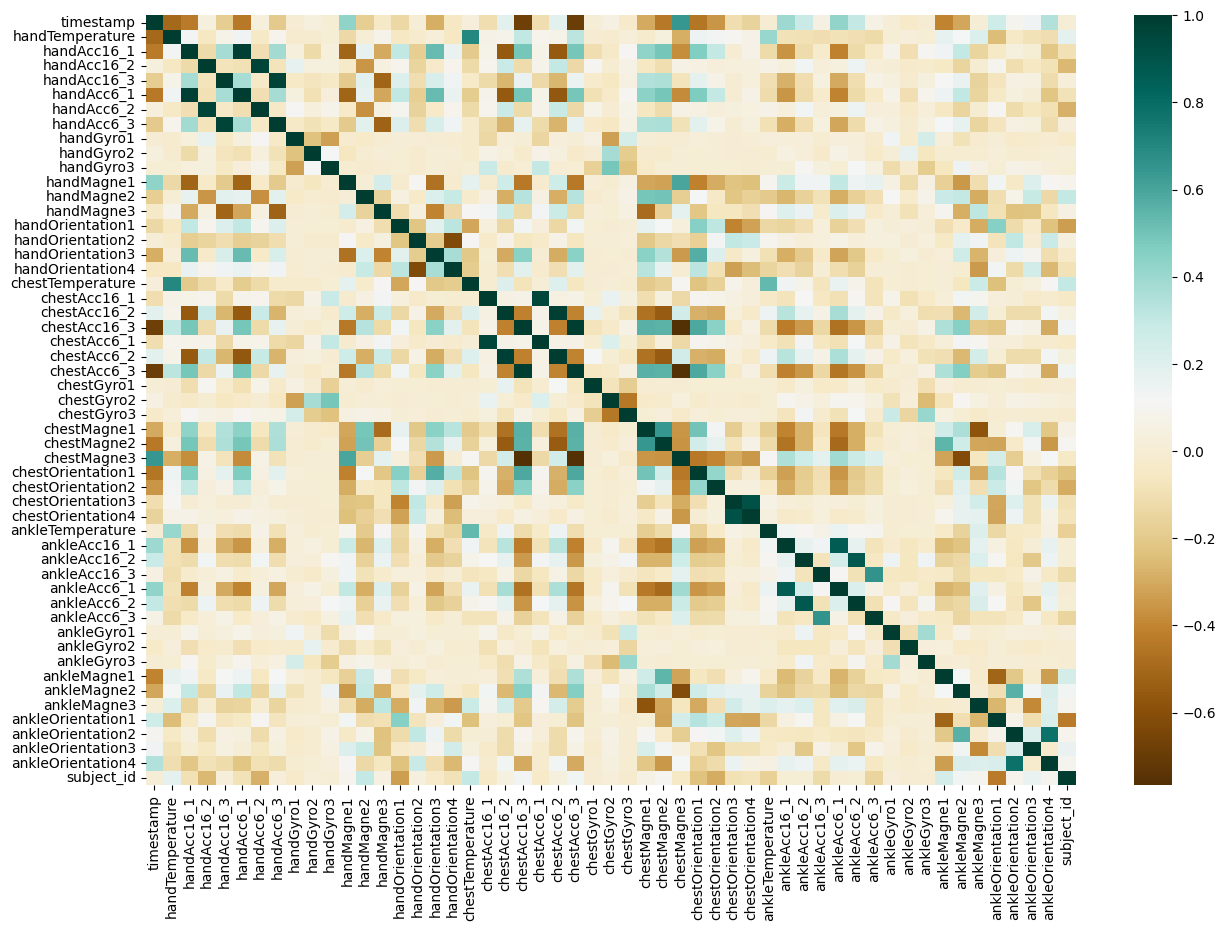

In [4]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = df.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool_), cmap = "BrBG",ax=ax)
plt.show()

In [5]:
correlated_couples = (df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
                                .stack()
                                .sort_values(ascending=False)
                                .reset_index())
correlated_couples.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlated_couples

,Feature 1,Feature 2,Correlation
0,chestAcc16_3,chestAcc6_3,0.991006
1,chestAcc16_2,chestAcc6_2,0.984728
2,handAcc16_1,handAcc6_1,0.981441
3,handAcc16_3,handAcc6_3,0.972072
4,handAcc16_2,handAcc6_2,0.964042
...,...,...,...
1373,handOrientation2,handOrientation4,-0.627468
1374,timestamp,chestAcc16_3,-0.683643
1375,timestamp,chestAcc6_3,-0.686142
1376,chestAcc16_3,chestMagne3,-0.766114


In [6]:
correlated_couples

,Feature 1,Feature 2,Correlation
0,chestAcc16_3,chestAcc6_3,0.991006
1,chestAcc16_2,chestAcc6_2,0.984728
2,handAcc16_1,handAcc6_1,0.981441
3,handAcc16_3,handAcc6_3,0.972072
4,handAcc16_2,handAcc6_2,0.964042
...,...,...,...
1373,handOrientation2,handOrientation4,-0.627468
1374,timestamp,chestAcc16_3,-0.683643
1375,timestamp,chestAcc6_3,-0.686142
1376,chestAcc16_3,chestMagne3,-0.766114


In [7]:
# Выберем сильно коррелирующие столбцы
correlated_columns = correlated_couples[abs(correlated_couples["Correlation"]) >= 0.75]["Feature 2"]
correlated_columns


0             chestAcc6_3
1             chestAcc6_2
2              handAcc6_1
3              handAcc6_3
4              handAcc6_2
5             chestAcc6_1
6       chestOrientation4
7             ankleAcc6_2
8             ankleAcc6_1
9       ankleOrientation4
1376          chestMagne3
1377          chestMagne3
Name: Feature 2, dtype: object

In [8]:
# Можно заполнить средним значением в каждой группе всех кор столбцов, но тут просто удалим

# df.drop(columns=["chestAcc6_3", "chestAcc6_2", "handAcc6_1", "handAcc6_3", "handAcc6_2", "chestAcc6_1", "chestOrientation4", "ankleOrientation4", "chestMagne3"], inplace=True)
# df

In [9]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

In [10]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df.isna().transpose(),
#             cmap="YlGnBu",
#             cbar_kws={'label': 'Missing Data'})

# plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [11]:
# Можно заполнить через метод ближайших соседей (долго)
# from sklearn.impute import KNNImputer


# imputer = KNNImputer(n_neighbors=25)
# imputer.fit_transform(df)

In [12]:
# Заполним методом интерполяции

df = df.interpolate()
df.isna().sum().sum()

0

## Масштабирукм данные

In [13]:
# Используем стандартизацию (меняется форма распределения, в отличии от нормализации
# Для PCА лучше работает стандартизация

from sklearn.preprocessing import StandardScaler


df_std = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(df_std, index=df.index, columns=df.columns)
scaled_df

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,-1.077886,1.383760,0.757231,0.584776,0.510664,0.762694,0.616920,0.534955,-0.011434,-0.026646,...,0.010026,0.013753,0.737136,1.134555,-1.145553,-0.510941,0.786246,1.336797,-0.708140,0.190410
1,1.655200,-1.542161,0.051790,0.072016,1.098267,-0.226447,0.000586,0.693620,0.107743,-0.437495,...,-1.032808,0.877262,-0.210992,-0.804863,-0.896624,0.725106,-0.851330,0.297695,-0.536677,-1.103768
2,-0.875290,1.098304,0.344312,-1.781430,-0.864405,0.364464,-1.869295,-0.835905,0.024908,0.014511,...,0.035695,-0.004352,0.515551,0.638528,0.590981,-0.732416,1.373972,0.262530,1.674988,1.484589
3,0.971193,-0.293292,-1.252472,0.362269,-0.831548,-1.309192,0.393529,-0.897058,1.489085,-0.085672,...,-0.213025,-1.720091,0.104544,1.450536,0.369273,0.186609,1.565125,0.008559,1.114097,-1.103768
4,-0.926540,0.598757,0.627159,0.752136,0.083334,0.640523,0.780732,0.146643,0.001532,-0.039074,...,0.005874,-0.002954,0.569350,-0.275132,-0.208420,-0.628202,-1.176374,-0.146954,-0.890970,0.621803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,1.516186,0.812849,-0.659715,0.202325,-0.310987,-0.753307,0.519869,-0.075309,-0.128408,0.805766,...,0.738288,-0.422473,0.194368,-1.155074,0.497191,-0.139528,-1.093288,0.733590,-0.296111,0.190410
534597,0.687313,1.044781,-0.466995,0.037284,-0.400220,-0.517513,0.195118,-0.254573,0.028656,0.193082,...,-2.808538,-1.501461,-0.360189,1.335589,0.094996,0.251696,1.345437,0.198171,1.414949,0.190410
534598,0.712516,1.276714,-0.274276,-0.127756,-0.489454,-0.281719,-0.129634,-0.433837,0.185719,-0.419602,...,-0.003788,-0.198810,-1.085757,0.831770,-0.874481,0.669670,0.696299,1.318086,0.699344,0.190410
534599,1.482655,-2.505574,1.404064,0.997765,-3.439181,1.803451,0.371647,-2.727570,3.067928,2.949408,...,0.621058,-2.744020,-0.279940,-0.593700,1.398596,-0.990360,-1.266513,-1.047464,-0.906017,0.621803


## Уменьшаем размерность

In [14]:
# PCA Находит проекцию данных на новое пространство меньшей размерности
# Введем процент сохраненной информации

from sklearn.decomposition import PCA


pca = PCA(0.95) # Можно задать n_components

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents)
print(principalDf.shape)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)) # Дисперсии
print(pca.explained_variance_ratio_.sum())

(534601, 33)
Explained variation per principal component: [0.17851572 0.07662817 0.0617213  0.05637949 0.0529433  0.04634389
 0.0426382  0.03814318 0.0368918  0.03317978 0.02938425 0.02521645
 0.0230405  0.02270655 0.02125344 0.01991816 0.01796683 0.01718571
 0.01498313 0.01394952 0.01344563 0.01314069 0.01230648 0.0114162
 0.0105073  0.01020446 0.00923591 0.00862    0.0080743  0.00784621
 0.00682303 0.00654918 0.00633049]
0.9534892549019941


## Кластеризация

### Метод локтя

d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

CPU times: total: 5min 52s
Wall time: 35.5 s


<Axes: >

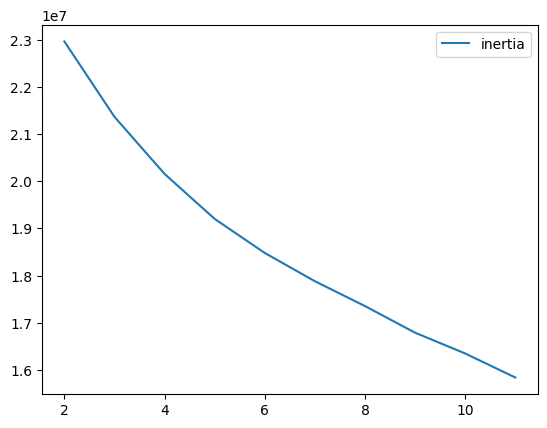

In [15]:
%%time
from sklearn.cluster import KMeans


inertia_df = pd.DataFrame(data=[], index=range(2, 12), columns=['inertia'])

for n_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(principalDf)

    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

inertia_df.plot()

In [17]:
from sklearn.metrics import silhouette_score

n_clusters = 5
clusterer = KMeans(n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(principalDf)

df_with_labels = principalDf.copy()
df_with_labels["labels"] = cluster_labels
sample_df_with_labels = df_with_labels.sample(frac=0.1, random_state=42)
silhouette_avg = silhouette_score(sample_df_with_labels.iloc[:, :-1], sample_df_with_labels.iloc[:, -1:])

print("For n_clusters =", n_clusters, ", the silhouette is :", silhouette_avg)

d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For n_clusters = 5 , the silhouette is : 0.14180693323411855


In [18]:
inertia = clusterer.inertia_
inertia

19104958.226119414

In [19]:
cluster_labels

array([2, 0, 1, ..., 1, 4, 0])

## Подготовка ответов

In [20]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()
predictions

,index,activityID
0,0,2
1,1,0
2,2,1
3,3,1
4,4,3
...,...,...
534596,534596,0
534597,534597,1
534598,534598,1
534599,534599,4


In [21]:
encoding_dict = {}

for i, label in enumerate(predictions['activityID'].unique()):
    encoding_dict[label] = i + 1


def encode(label):
    return encoding_dict[label]


predictions = predictions['activityID'].apply(encode)
predictions


0         1
1         2
2         3
3         3
4         4
         ..
534596    2
534597    3
534598    3
534599    5
534600    2
Name: activityID, Length: 534601, dtype: int64

In [22]:
predictions.to_csv("predict.csv", index=False)